Inizio esplorazione, carichiamo il database e osserviamo le colonne

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('loans.csv')

data.columns

Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

## Descrizione delle Variabili

Il dataset contiene le seguenti variabili:

- **customer.id**: Identificatore univoco del cliente
- **credit.policy**: Indica se il cliente rispetta la politica creditizia dell'azienda (binaria: 0 o 1)
- **purpose**: Scopo del prestito (ad es. educazione, carta di credito, casa, ecc.)
- **int.rate**: Tasso di interesse del prestito (in percentuale)
- **installment**: Importo mensile della rata del prestito
- **log.annual.inc**: Logaritmo del reddito annuale del cliente
- **dti**: Debt-to-Income ratio - rapporto tra il debito totale e il reddito annuale del cliente
- **fico**: Punteggio FICO del cliente (indicatore di affidabilità creditizia, range: 300-850)
- **days.with.cr.line**: Numero di giorni da quando il cliente ha aperto la prima linea di credito
- **revol.bal**: Saldo revolving del cliente (debito su carte di credito e linee di credito aperte)
- **revol.util**: Percentuale di utilizzo del credito revolving disponibile
- **inq.last.6mths**: Numero di richieste di credito negli ultimi 6 mesi
- **delinq.2yrs**: Numero di volte in cui il cliente è stato in ritardo con i pagamenti negli ultimi 2 anni
- **pub.rec**: Numero di registrazioni pubbliche negative (fallimenti, pignoramenti, ecc.)
- **not.fully.paid**: Variabile target - indica se il prestito è stato completamente pagato (0 = sì, 1 = no)

In [3]:
data.head(10)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,10001,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0.0,0,0,0
1,10002,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0.0,0,0,0
2,10003,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1.0,0,0,0
3,10004,1,debt_consolidation,0.1008,162.34,11.350407,8.1,712,2699.958333,33667.0,73.2,1.0,0,0,0
4,10005,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0.0,1,0,0
5,10006,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807.0,51,0.0,0,0,0
6,10007,1,debt_consolidation,0.1496,194.02,10.714418,4,667,3180.041667,3839.0,76.8,0.0,0,1,1
7,10008,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220.0,68.6,0.0,0,0,1
8,10009,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909.0,51.1,1.0,0,0,0
9,10010,1,debt_consolidation,0.1221,84.12,10.203592,10,707,2730.041667,5630.0,23,1.0,0,0,0


In [4]:
print(len(data))

9578


Non ci sono dati mancanti, gli 0 hanno significato

Abbiamo tanti dati mancanti, ma essendo che si tratta di un grande dataset, possiamo ricavare successivamente i valori, o lavorare su quelli presenti già


In [6]:
missing = data[data['customer.id']==0]

print(len(missing))

0


In [11]:
data.loc[30]

customer.id                       10031
credit.policy                         1
purpose              debt_consolidation
int.rate                         0.0807
installment                      156.84
log.annual.inc                11.512925
dti                                 2.3
fico                                742
days.with.cr.line           3148.958333
revol.bal                        9698.0
revol.util                         19.4
inq.last.6mths                      0.0
delinq.2yrs                           0
pub.rec                               0
not.fully.paid                        0
Name: 30, dtype: object

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   int64  
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   float64
 4   installment        9578 non-null   float64
 5   log.annual.inc     9573 non-null   float64
 6   dti                9578 non-null   object 
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9549 non-null   float64
 9   revol.bal          9577 non-null   float64
 10  revol.util         9516 non-null   object 
 11  inq.last.6mths     9548 non-null   float64
 12  delinq.2yrs        9549 non-null   object 
 13  pub.rec            9549 non-null   object 
 14  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


In [46]:
data.describe()

,customer.id,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9576.0,9578.000000,9578.000000,9573.000000,9577.000000,9578.000000,9549.000000,9.577000e+03,9515.000000,9548.000000,9548.0,9548.0,9578.000000
mean,14789.500000,0.805033,0.125529,319.089413,10.931892,12.607369,711.159532,4562.026085,1.691529e+04,46.933871,1.571743,0.163699,0.062107,0.160054
std,2765.074773,0.396196,0.202225,207.071301,0.614766,6.883998,42.024737,2497.985733,3.375770e+04,29.710518,2.198151,0.546673,0.262165,0.366676
min,10001.000000,0.0,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000
25%,12395.250000,1.0,0.103900,163.770000,10.558414,7.220000,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.0,0.0,0.000000
50%,14789.500000,1.0,0.122100,268.950000,10.928238,12.670000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.0,0.0,0.000000
75%,17183.750000,1.0,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.825200e+04,71.000000,2.000000,0.0,0.0,0.000000
max,19578.000000,1.0,14.700000,940.140000,14.528354,29.960000,1812.000000,17639.958330,1.207359e+06,670.000000,33.000000,13.0,5.0,1.000000


## Pulizia e conversione dei tipi di dato

Alcune variabili sono salvate come `object` ma dovrebbero essere numeriche. Convertiamole correttamente.

In [52]:
# Convertiamo i tipi di dato corretti
# credit.policy dovrebbe essere int (0 o 1)
data['credit.policy'] = pd.to_numeric(data['credit.policy'], errors='coerce').astype('Int64')

# dti (debt-to-income ratio) dovrebbe essere float
data['dti'] = pd.to_numeric(data['dti'], errors='coerce')

# revol.util (revolving utilization) dovrebbe essere float
data['revol.util'] = pd.to_numeric(data['revol.util'], errors='coerce')

# delinq.2yrs dovrebbe essere int (numero di ritardi)
data['delinq.2yrs'] = pd.to_numeric(data['delinq.2yrs'], errors='coerce').astype('Int64')

# pub.rec dovrebbe essere int (numero di registrazioni pubbliche)
data['pub.rec'] = pd.to_numeric(data['pub.rec'], errors='coerce').astype('Int64')

print(f"Valori mancanti per colonna:")
percent_missing = data.isnull().mean() * 100
print(percent_missing)


Valori mancanti per colonna:
customer.id          0.000000
credit.policy        0.020881
purpose              0.000000
int.rate             0.000000
installment          0.000000
log.annual.inc       0.052203
dti                  0.010441
fico                 0.000000
days.with.cr.line    0.302777
revol.bal            0.010441
revol.util           0.657757
inq.last.6mths       0.313218
delinq.2yrs          0.313218
pub.rec              0.313218
not.fully.paid       0.000000
dtype: float64


In [44]:
data[data['delinq.2yrs'].isna()]


,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
245,10246,1,debt_consolidation,0.1091,304.90,11.163684,18.96,692,5430.0,5749.0,43.2,1.0,<NA>,0,0
7725,17726,0,all_other,0.0775,156.11,11.156251,8.81,772,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7726,17727,0,all_other,0.0838,204.84,NaN,4.00,742,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7727,17728,0,all_other,0.0807,136.45,11.695247,4.00,742,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7728,17729,0,all_other,0.0933,80.69,11.608236,10.00,712,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7729,17730,0,all_other,0.0933,124.62,11.492723,10.00,707,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7731,17732,0,all_other,0.1028,164.42,11.461632,10.00,702,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7732,17733,0,all_other,0.0964,32.11,9.392662,10.00,697,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7733,17734,0,all_other,0.0996,103.20,11.918391,10.00,692,NaN,0.0,NaN,NaN,<NA>,<NA>,0
7734,17735,0,all_other,0.1028,113.39,12.100712,10.00,687,NaN,0.0,NaN,NaN,<NA>,<NA>,0


Abbiamo trovare un numero considerevole di valori mancanti all'interno del dataset, ora pero dobbiamo capire come gestirli, se riempirli con la media, oppure cancellarli

Colonne numeriche da visualizzare: 13
['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']


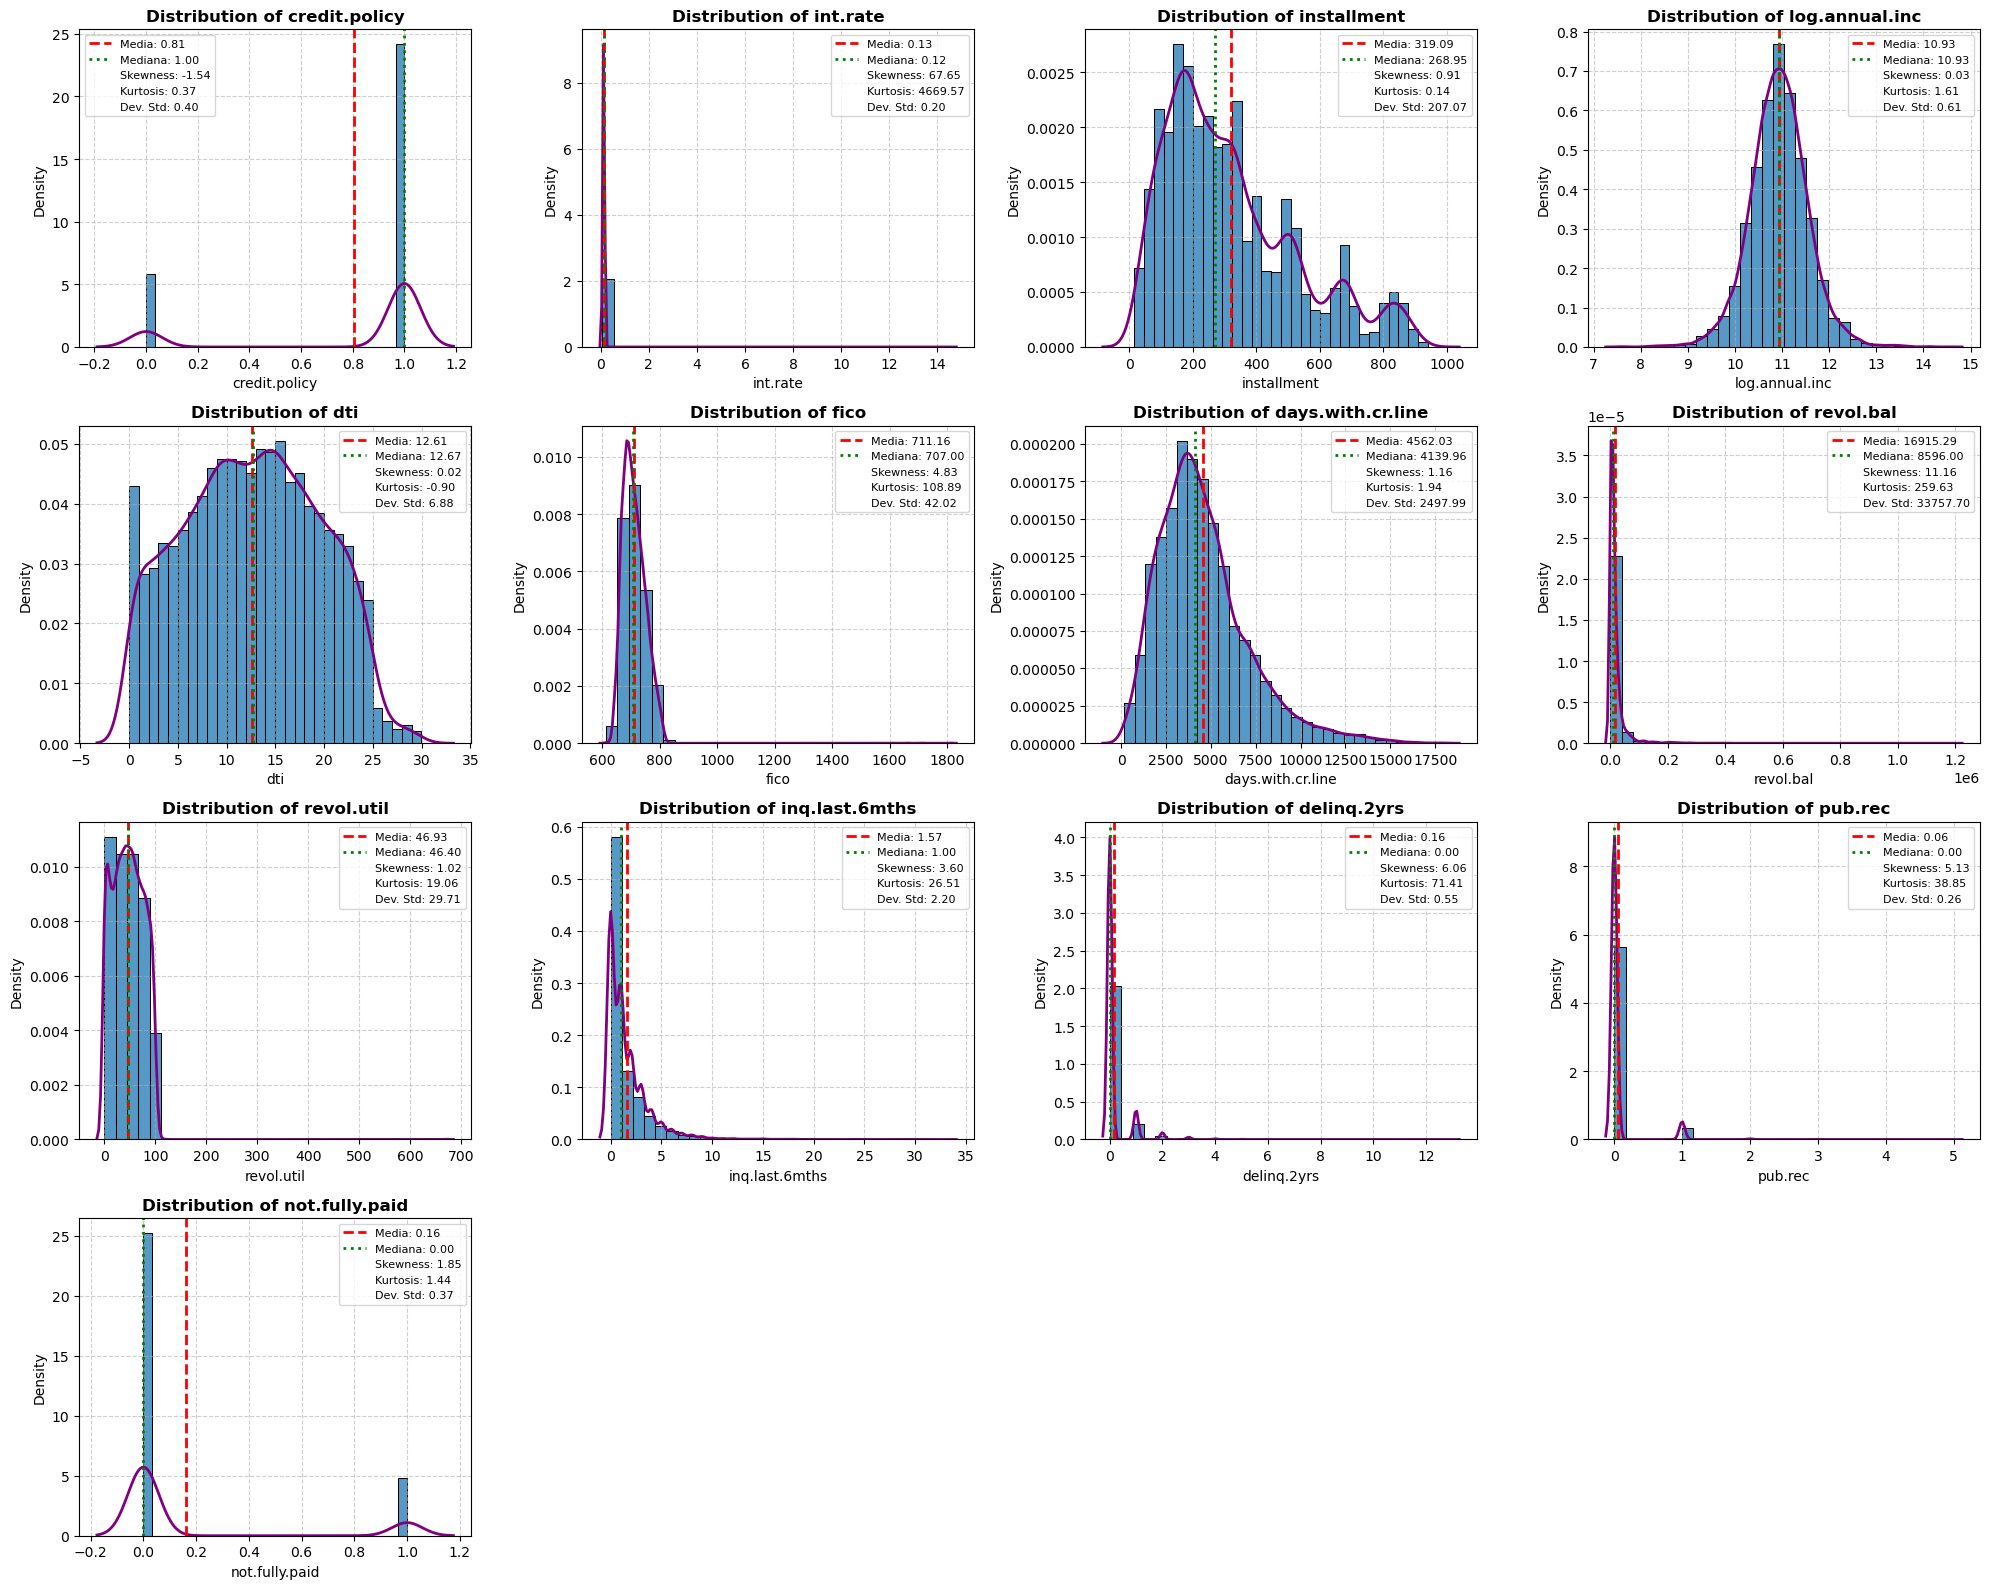

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns

# Selezioniamo solo le colonne numeriche ed escludiamo customer.id
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('customer.id')

print(f"Colonne numeriche da visualizzare: {len(numeric_cols)}")
print(numeric_cols.tolist())

# Calcoliamo la griglia necessaria (4 colonne)
n_cols = len(numeric_cols)
n_rows = int(np.ceil(n_cols / 4))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, 4, i+1)
    
    # Istogramma con KDE
    ax = sns.histplot(data[col], bins=30, edgecolor="black", stat='density', kde=False)
    sns.kdeplot(data[col], color='purple', lw=2, ax=ax)
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    
    # Calcoliamo le statistiche
    mean_val = data[col].mean()
    median_val = data[col].median()
    skew_val = data[col].skew()  
    kurt_val = data[col].kurt()
    std_val = data[col].std()
    
    # Linee verticali per media e mediana
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    # Statistiche nella legenda
    plt.plot([], [], ' ', label=f'Skewness: {skew_val:.2f}')
    plt.plot([], [], ' ', label=f'Kurtosis: {kurt_val:.2f}')
    plt.plot([], [], ' ', label=f'Dev. Std: {std_val:.2f}')
    
    plt.legend(fontsize=8, loc='best')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()